In [3]:
import os
import pickle
import click
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import logging

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

In [4]:
def read_dataframe():
    directory_name = "../Data"

    try:
        os.mkdir(directory_name)
        logging.info(f"Directory '{directory_name}' created successfully.")
    except FileExistsError:
        logging.warning(f"Directory '{directory_name}' already exists.")
    except PermissionError:
        logging.error(f"Permission denied: Unable to create '{directory_name}'.")
    except Exception as e:
        logging.error(f"An error occurred: {e}")

    dataset = 'alexteboul/diabetes-health-indicators-dataset'
    download_path = '../Data'
    
    # Removing data if they are present in the Data Directory 
    for filename in os.listdir(download_path):
        file_path = os.path.join(download_path, filename)
        if os.path.isfile(file_path):
            os.remove(file_path)

    api = KaggleApi()
    api.authenticate()
    
    api.dataset_download_files(dataset, path=download_path, unzip=True)
    
    csv_file = '../Data/diabetes_012_health_indicators_BRFSS2015.csv'

    try:
        diabetes_df = pd.read_csv(csv_file)
        logging.info(f"File .csv loaded. Num of rows: {len(diabetes_df)}")
    except FileNotFoundError:
        logging.info("Diabetes.csv not found.")
    except Exception as e:
        logging.info(f"Error while loading Diabetes.csv: {e}")

    return diabetes_df

In [5]:
diabetes_df = read_dataframe()

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


In [25]:
diabetes_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
# Top features for ML from Features.ipynb
top_features = ['Diabetes_012', 'BMI', 'Age','Income','PhysHlth','Education','GenHlth','MentHlth','HighBP','Fruits']

In [20]:
diabetes_df = diabetes_df[top_features]

In [8]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [24]:
continuous = ['Age', 'BMI', 'Income', 'PhysHlth', 'MentHlth']
scaler = StandardScaler()
diabetes_df[continuous] = scaler.fit_transform(diabetes_df[continuous])

In [26]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
def balancing_classes(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    return X_resampled, y_resampled

In [ ]:
def split_data(diabetes_df):
    X = diabetes_df.drop("Diabetes_binary", axis=1)
    y = diabetes_df["Diabetes_binary"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, y_train = balancing_classes(X_train, y_train)

    with open("../Data/X_train.pkl", "wb") as f:
        pickle.dump(X_train, f)

    with open("../Data/X_test.pkl", "wb") as f:
        pickle.dump(X_test, f)

    with open("../Data/y_train.pkl", "wb") as f:
        pickle.dump(y_train, f)

    with open("../Data/y_test.pkl", "wb") as f:
        pickle.dump(y_test, f)

In [16]:
from collections import Counter

In [27]:
def split_data_v2(diabetes_df):
    X = diabetes_df.drop("Diabetes_012", axis=1)
    y = diabetes_df["Diabetes_012"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, y_train = balancing_classes(X_train, y_train)

    print(f"Původní distribuce tříd: {Counter(y_train)}")

    return X_train, X_test, y_train, y_test

In [28]:
X_train, X_test, y_train, y_test = split_data_v2(diabetes_df)

Původní distribuce tříd: Counter({0.0: 170908, 2.0: 170908, 1.0: 170908})


In [34]:
y_train.count()

512724

In [15]:
X_train, y_train = balancing_classes(X_train, y_train)

In [21]:
X_train.count()

HighBP                  512724
HighChol                512724
CholCheck               512724
BMI                     512724
Smoker                  512724
Stroke                  512724
HeartDiseaseorAttack    512724
PhysActivity            512724
Fruits                  512724
Veggies                 512724
HvyAlcoholConsump       512724
AnyHealthcare           512724
NoDocbcCost             512724
GenHlth                 512724
MentHlth                512724
PhysHlth                512724
DiffWalk                512724
Sex                     512724
Age                     512724
Education               512724
Income                  512724
dtype: int64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

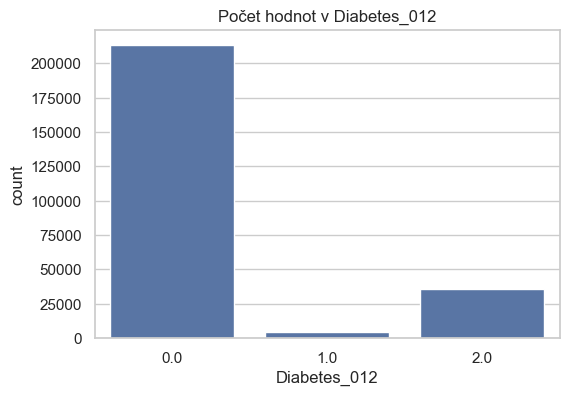

In [44]:
cat_cols = 'Diabetes_012'

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x=cat_cols, data=diabetes_df)
plt.title(f'Počet hodnot v {cat_cols}')
plt.show()

In [45]:
cat_cols = 'Diabetes_012'

sns.set(style="whitegrid")

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=y_train)
    plt.title(f'Počet hodnot v {col}')
    plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Diabetes_012'>

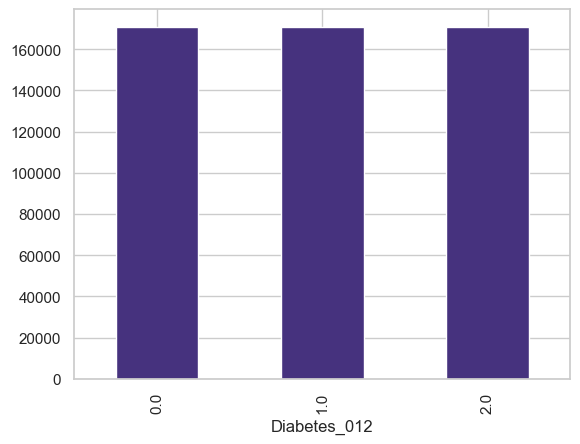

In [46]:
y_train.value_counts().sort_index().plot(kind='bar', color=sns.color_palette('viridis')[0])

In [3]:
pip install boto3

   ---------------------------------------- 0.0/13.8 MB ? eta -:--:--
   ------ --------------------------------- 2.4/13.8 MB 15.0 MB/s eta 0:00:01
   ------------------------ --------------- 8.4/13.8 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  13.6/13.8 MB 23.1 MB/s eta 0:00:01
   ---------------------------------------- 13.8/13.8 MB 22.8 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- ----------------------------- 1/4 [botocore]
   ---------- -----------

In [8]:
import boto3
from dotenv import load_dotenv
import os

In [9]:
load_dotenv()  
aws_access_key_id = os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key = os.getenv("AWS_SECRET_ACCESS_KEY")
aws_region = os.getenv("AWS_REGION")   
s3 = boto3.client(
    service_name='s3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name=aws_region
)  

In [ ]:
s3.upload_fileobj(Fileobj=)